Task 03 : Fraud Detection

Name : Suraj Gaikwad

Domain : Data Analytics

Oasis Infotype Virtual Internship

In [3]:
# Importing necessary Libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading dataset

data = pd.read_csv("creditcard.csv")

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [15]:
normal = data[data.Class == 0]
scam = data[data.Class == 1]

In [17]:
scam.Class.value_counts()

Class
1    492
Name: count, dtype: int64

In [43]:
raw_data = pd.read_csv("creditcard.csv")
print("There are " +  str(len(raw_data))+" observations in the credit card found dataset.")
print("There are "+ str(len(raw_data.columns)) + " variables in the dataset.")

#Display the first rows in the dataset

raw_data.head()

There are 284807 observations in the credit card found dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
n_replicas = 10 

big_raw_data = pd.DataFrame(np.repeat(raw_data.values , n_replicas, axis = 0), columns = raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


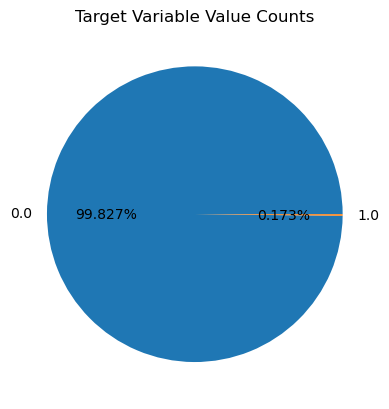

In [45]:

labels = big_raw_data.Class.unique()
sizes = big_raw_data.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels , autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

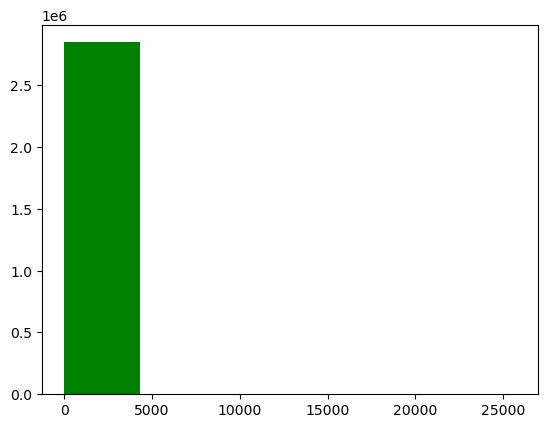

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [47]:

plt.hist(big_raw_data.Amount.values,6,histtype='bar' , facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

In [49]:
new_data = normal.sample(n=492)
scam

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [51]:
new_data = pd.concat([new_data,scam],axis=0)

In [53]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155579,105819.0,-0.633805,0.875358,-0.596077,-0.545433,1.437471,-0.385065,0.497555,-0.037632,1.564310,...,0.138317,0.981213,-0.164109,0.052188,-0.655157,-0.259580,0.680407,0.503931,1.00,0
116229,74192.0,-0.724310,0.807860,1.229836,-1.534830,0.314913,-0.221412,0.580334,0.175694,-0.247887,...,0.016611,0.034066,-0.127625,-0.265150,-0.373021,0.783622,0.126021,0.155794,0.69,0
210549,138031.0,-0.252980,-0.196553,1.038650,-0.396640,0.495445,0.320035,-0.419239,-0.334732,-1.103120,...,0.179953,0.892406,-0.457245,0.153148,-0.280950,0.239292,-0.144912,-0.079045,10.40,0
159624,112735.0,-0.621354,1.125258,0.779097,0.633239,1.144238,0.000733,1.971216,-0.557077,-0.729007,...,-0.065218,0.348784,-0.702958,-0.389356,1.103397,-0.230385,-0.144636,-0.373283,71.02,0
90330,62975.0,1.236615,0.173937,0.152385,0.515103,-0.301448,-0.597702,-0.138704,0.060845,0.051762,...,-0.277597,-0.917149,0.096370,-0.088804,0.173516,0.103376,-0.038288,0.013542,1.29,0


In [55]:
new_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,86741.006098,-2.333591,1.813411,-3.473133,2.257063,-1.632609,-0.700374,-2.782620,0.315218,-1.276932,...,0.351881,0.014223,-0.024853,-0.035728,0.036427,0.029132,0.082033,0.039860,106.145742,0.500000
std,47795.977098,5.503915,3.649397,6.238673,3.194305,4.169716,1.740330,5.847187,4.860710,2.322854,...,2.783107,1.164994,1.156664,0.560791,0.653810,0.486067,1.003048,0.407480,247.067279,0.500254
min,269.000000,-30.552380,-9.195985,-31.103685,-4.305016,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.172688,-7.263482,-1.869290,0.000000,0.000000
25%,45491.500000,-2.788129,-0.182749,-5.100380,-0.102678,-1.873814,-1.530108,-3.060742,-0.177867,-2.276337,...,-0.153125,-0.541855,-0.244501,-0.377133,-0.291179,-0.277601,-0.064968,-0.061974,1.180000,0.000000
50%,80681.500000,-0.798206,0.938493,-1.342457,1.287041,-0.509114,-0.669445,-0.643840,0.164955,-0.694979,...,0.160853,0.044937,-0.031769,0.015273,0.073010,-0.003729,0.057065,0.032124,16.440000,0.500000
75%,131376.500000,1.071964,2.798885,0.388549,4.235631,0.389899,-0.001135,0.269197,0.856881,0.184815,...,0.634681,0.599531,0.188079,0.373754,0.389751,0.318881,0.442167,0.208625,99.990000,1.000000
max,172710.000000,2.367906,22.057729,3.868252,12.114672,11.095089,6.590569,7.080555,20.007208,5.776678,...,27.202839,8.361985,5.466230,3.448620,2.208209,2.745261,3.052358,1.779364,2904.140000,1.000000


In [57]:
new_data.groupby("Class").mean()
X = new_data.drop("Class",axis=1)
Y = new_data["Class"]

In [61]:
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [67]:
pred = model.predict(x_test)

In [69]:
acc = accuracy_score(pred,y_test)

In [77]:
print(acc)

0.9390862944162437


In [83]:
pred = model.predict(x_test)
acc = accuracy_score(pred,y_test)
new_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.236608,-0.205211,0.135241,-0.187213,0.286013,0.095200,0.209685,-0.134093,0.158232,...,-0.058072,0.111490,0.063577,0.011974,-0.188377,-0.027585,-0.144554,0.007669,-0.007524,-0.125476
V1,0.236608,1.000000,-0.828225,0.883626,-0.617767,0.872811,0.314820,0.889087,-0.085594,0.673851,...,0.014270,-0.033457,-0.046355,-0.054428,-0.076033,0.053637,0.195261,0.194916,-0.022996,-0.443248
V2,-0.205211,-0.828225,1.000000,-0.870209,0.691044,-0.792072,-0.290212,-0.863177,-0.019862,-0.710666,...,0.036745,-0.007350,0.156834,-0.008189,0.104829,0.000088,-0.156034,0.006495,-0.241190,0.496325
V3,0.135241,0.883626,-0.870209,1.000000,-0.777502,0.850458,0.463070,0.889859,-0.169129,0.768286,...,0.026910,-0.056480,-0.036032,0.027784,-0.073786,-0.008189,0.104371,0.137700,-0.003012,-0.570948
V4,-0.187213,-0.617767,0.691044,-0.777502,1.000000,-0.574686,-0.427190,-0.715676,0.098638,-0.797939,...,-0.016462,0.110286,0.022069,-0.096020,-0.049729,0.148934,-0.010087,-0.070683,-0.000721,0.715689
V5,0.286013,0.872811,-0.792072,0.850458,-0.574686,1.000000,0.300850,0.842243,-0.208755,0.658124,...,0.041528,-0.098984,-0.099944,-0.128759,-0.083771,0.065628,0.195374,0.188653,-0.113919,-0.364387
V6,0.095200,0.314820,-0.290212,0.463070,-0.427190,0.300850,1.000000,0.280739,-0.575398,0.384269,...,0.008436,0.004972,0.333818,-0.008139,-0.102219,-0.052060,-0.164362,-0.040764,0.169718,-0.400911
V7,0.209685,0.889087,-0.863177,0.889859,-0.715676,0.842243,0.280739,1.000000,0.090280,0.765871,...,0.044320,-0.118958,-0.092615,-0.031413,0.057556,0.029454,0.237192,0.164831,0.132914,-0.476730
V8,-0.134093,-0.085594,-0.019862,-0.169129,0.098638,-0.208755,-0.575398,0.090280,1.000000,-0.072378,...,-0.105691,0.030428,-0.430258,0.073822,0.233758,0.045829,0.286724,-0.023048,0.023767,0.052574
V9,0.158232,0.673851,-0.710666,0.768286,-0.797939,0.658124,0.384269,0.765871,-0.072378,1.000000,...,0.158608,-0.249920,-0.063751,0.032180,0.006092,-0.138830,0.136057,0.161533,0.044291,-0.561746


In [90]:
def pred(data):
    data = np.asarray(data).reshape(1,-1)
    predd = model.predict(data)
    if predd == 0:
        print("it's a normal card")
    else:
        print("it's a scam card")

In [100]:
new_data = [4,
 1.22965763450793,
 0.141003507049326,
 0.0453707735899449,
 1.20261273673594,
 0.191880988597645,
 0.272708122899098,
 -0.00515900288250983,
 0.0812129398830894,
 0.464959994783886,
 -0.0992543211289237,
 -1.41690724314928,
 -0.153825826253651,
 -0.75106271556262,
 0.16737196252175,
 0.0501435942254188,
 -0.443586797916727,
 0.00282051247234708,
 -0.61198733994012,
 -0.0455750446637976,
 -0.21963255278686,
 -0.167716265815783,
 -0.270709726172363,
 -0.154103786809305,
 -0.780055415004671,
 0.75013693580659,
 -0.257236845917139,
 0.0345074297438413,
 0.00516776890624916,
 4.99]

pred(new_data)

it's a scam card
